In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_data = pd.read_csv("Company_Data.csv")
sales_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
sales_data.shape

(400, 11)

In [6]:
sales_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Label encoder assigns numberical values for the categorical values

In [9]:
sales_data['ShelveLoc']=le.fit_transform(sales_data['ShelveLoc'])
sales_data['Urban']=le.fit_transform(sales_data['Urban'])
sales_data['US']=le.fit_transform(sales_data['US'])

In [10]:
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [11]:
sales_data.insert(11,'sales_category','')

In [12]:
sales_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,


In [13]:
for i in range(0,len(sales_data['Sales']),1):
    if sales_data['Sales'][i]>=11.0:
        sales_data['sales_category'][i]='high'
    elif sales_data['Sales'][i]<=6.0:
        sales_data['sales_category'][i]='low'
    else:
        sales_data['sales_category'][i]='medium'   

In [14]:
sales_data.head(8)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,medium
3,7.40,117,100,4,466,97,2,55,14,1,1,medium
4,4.15,141,64,3,340,128,0,38,13,1,0,low
5,10.81,124,113,13,501,72,0,78,16,0,1,medium
6,6.63,115,105,0,45,108,2,71,15,1,0,medium
7,11.85,136,81,15,425,120,1,67,10,1,1,high


In [15]:
x = sales_data.iloc[:,1:11]
y = sales_data['sales_category']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [22]:
y_pred

array(['medium', 'low', 'medium', 'medium', 'low', 'high', 'low',
       'medium', 'low', 'medium', 'high', 'medium', 'low', 'medium',
       'medium', 'low', 'high', 'medium', 'low', 'low', 'medium',
       'medium', 'medium', 'low', 'low', 'medium', 'medium', 'medium',
       'low', 'low', 'medium', 'medium', 'low', 'low', 'medium', 'medium',
       'low', 'low', 'medium', 'low', 'low', 'high', 'medium', 'medium',
       'high', 'medium', 'high', 'medium', 'low', 'medium', 'medium',
       'medium', 'medium', 'medium', 'low', 'low', 'low', 'medium', 'low',
       'medium', 'medium', 'low', 'low', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'medium', 'low', 'medium', 'high',
       'low', 'medium', 'medium', 'low', 'low', 'low', 'low'],
      dtype=object)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.29      0.22      0.25         9
         low       0.62      0.80      0.70        25
      medium       0.73      0.65      0.69        46

    accuracy                           0.65        80
   macro avg       0.55      0.56      0.55        80
weighted avg       0.65      0.65      0.64        80



In [36]:
print("Accuracy score: ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy score:  65.0 %


In [37]:
print(confusion_matrix(y_test,y_pred))

[[ 2  0  7]
 [ 1 20  4]
 [ 4 12 30]]


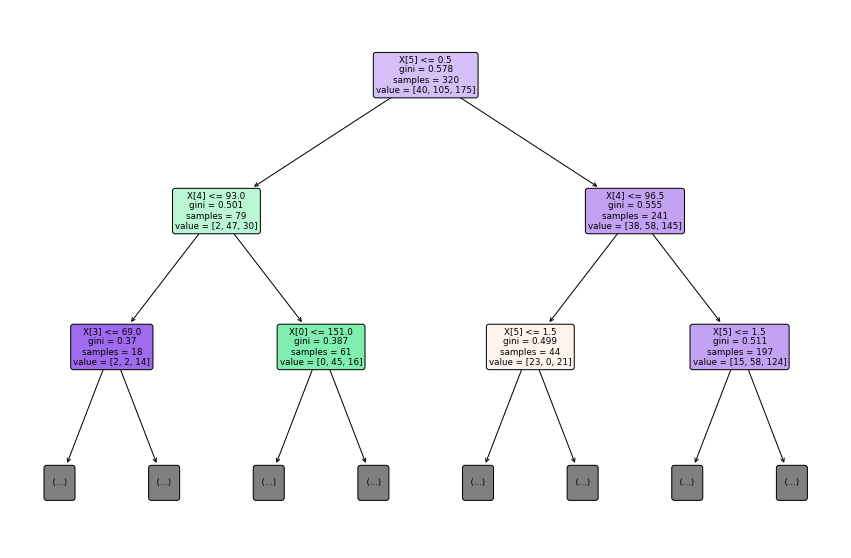

In [38]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,rounded=True,filled=True,max_depth=2)
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
gr_model = GridSearchCV(estimator=dt,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
gr_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]})

In [40]:
print(gr_model.best_params_)
print(gr_model.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.69375


In [41]:
dt_newmodel = DecisionTreeClassifier(criterion= 'entropy',max_depth=10, min_samples_leaf=1, min_samples_split= 2)
dt_newmodel.fit(x_train,y_train)
y_predn = dt_newmodel.predict(x_test)
print(accuracy_score(y_test,y_predn))

0.6875


In [42]:
feature_dt = x_train.columns
len(feature_dt)

10

In [43]:
imp_feature_dt = dt.feature_importances_
len(imp_feature_dt)

10

In [44]:
data_dt=pd.DataFrame({'feature':feature_dt,'imp_feature':imp_feature_dt})
data_dt=data_dt.sort_values('imp_feature')

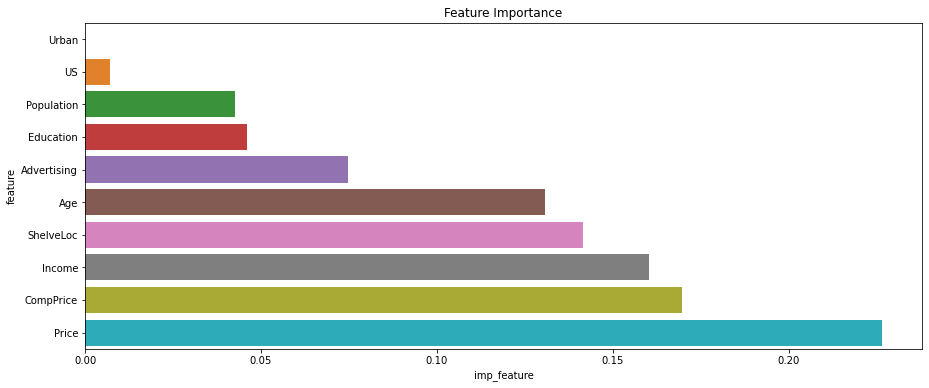

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_dt)
plt.show()

In [46]:
from sklearn.feature_selection import SelectFromModel

In [47]:
selctr=SelectFromModel(estimator=DecisionTreeClassifier())
selctr.fit(x_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier())

In [48]:
selctr.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [49]:
len(x_train.columns)

10

In [50]:
feature = x_train.columns[selctr.get_support()]

In [51]:
len(feature)

5

In [52]:
x_train_dt=selctr.transform(x_train)
x_test_dt=selctr.transform(x_test)

In [53]:
dt_model_imp=DecisionTreeClassifier().fit(x_train_dt,y_train)
y_pred_imp=dt_model_imp.predict(x_test_dt)

In [54]:
print(accuracy_score(y_test,y_pred_imp))

0.675


In [55]:
print(confusion_matrix(y_test,y_pred_imp))

[[ 4  0  5]
 [ 1 19  5]
 [ 5 10 31]]


In [56]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

        high       0.40      0.44      0.42         9
         low       0.66      0.76      0.70        25
      medium       0.76      0.67      0.71        46

    accuracy                           0.68        80
   macro avg       0.60      0.63      0.61        80
weighted avg       0.68      0.68      0.68        80



In [57]:
imp_feature=dt_model_imp.feature_importances_
imp_feature

array([0.18681222, 0.19575846, 0.24621734, 0.14168405, 0.22952793])

In [58]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

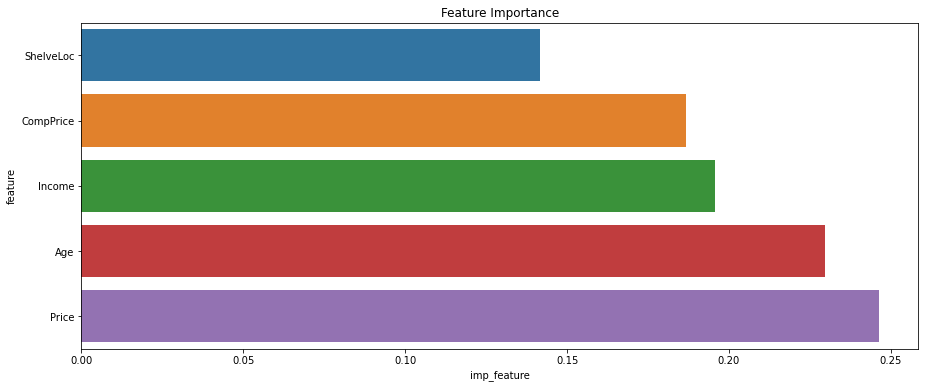

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

In [60]:
from sklearn.feature_selection import RFE

In [61]:
selector_rfe=RFE(DecisionTreeClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [62]:
selector_rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [63]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [64]:
len(x_train.columns[selector_rfe.get_support()])

5

In [65]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [66]:
dt_model_rfe=DecisionTreeClassifier().fit(x_train_rfe,y_train)

In [67]:
y_pred_rfe=dt_model_rfe.predict(x_test_rfe)

In [68]:
print(accuracy_score(y_test,y_pred_rfe))

0.65


In [69]:
print(confusion_matrix(y_test,y_pred_rfe))

[[ 4  0  5]
 [ 0 19  6]
 [ 7 10 29]]


In [70]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

        high       0.36      0.44      0.40         9
         low       0.66      0.76      0.70        25
      medium       0.72      0.63      0.67        46

    accuracy                           0.65        80
   macro avg       0.58      0.61      0.59        80
weighted avg       0.66      0.65      0.65        80



In [71]:
imp_feature_rfe=dt_model_rfe.feature_importances_

In [72]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

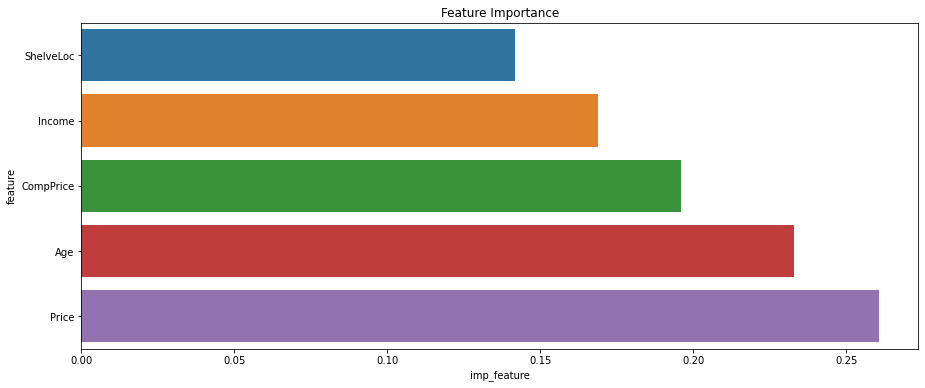

In [74]:
plt.figure(figsize=(15,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()